In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append('..')
from wyscout.events import get_key_pass_events
from wyscout.match import get_match_events, get_team_matches
from wyscout.api import set_auth

In [3]:
SOUTHEND = 1687
SEASON_2022 = 188172

In [4]:
from wyscout.team import get_team_squad
squad = get_team_squad(SOUTHEND, SEASON_2022)
squad = {p["wyId"]: p for p in squad["squad"]}

In [5]:
def get_key_passes():
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    key_pass_events = []
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            key_pass_events.append(get_key_pass_events(
                m, events["events"], SOUTHEND))
    return key_pass_events

In [6]:
matches = get_key_passes()

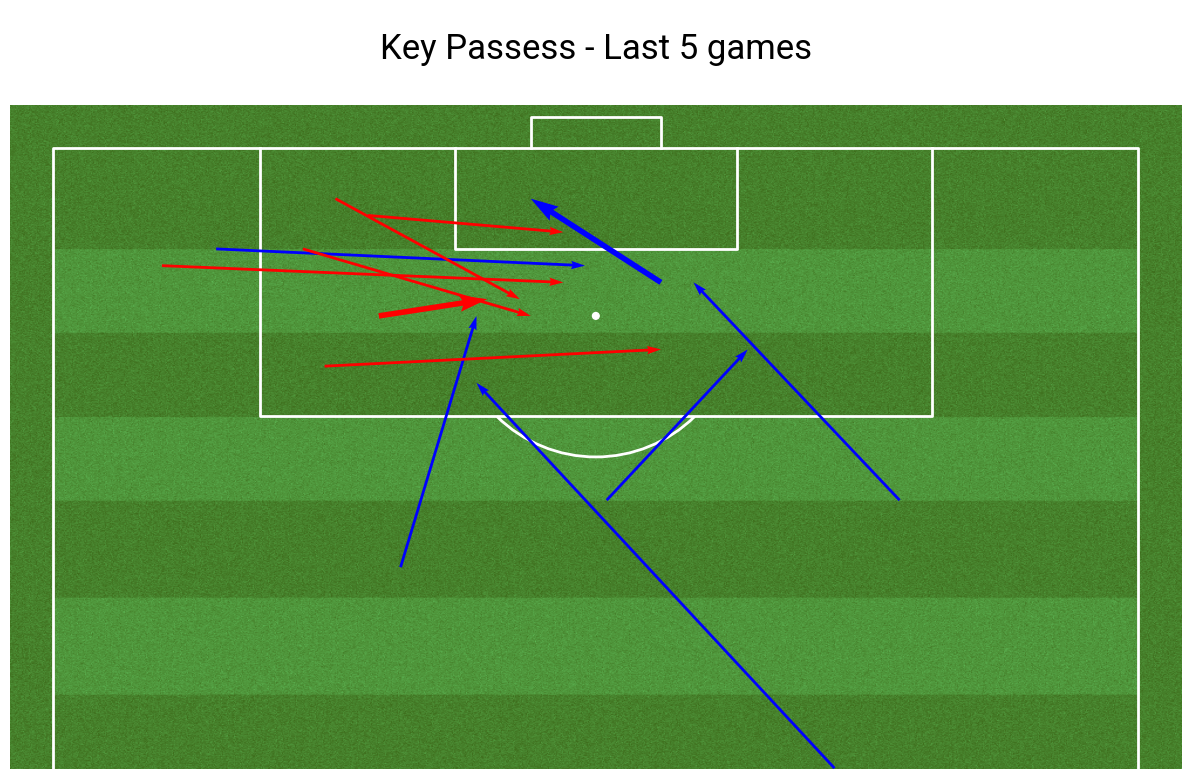

In [7]:
from wyscout.viz.key_passes import plot_key_passes

plot_key_passes(matches, 5, ["J. Bridge"])

In [8]:
def get_shots():
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    events_out = []
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            events_out.append({
                "matchId": m["matchId"],
                "date": m["date"],
                "label": m["label"],
                "events": [e for e in events["events"] if e["team"]["id"] == SOUTHEND]
            })
    return events_out

In [9]:
match_events = get_shots()

In [10]:
event = [e for e in match_events[4]["events"] if e["type"]["primary"] == "shot"][0]

In [11]:
from wyscout.events import get_video_for_event

get_video_for_event(event)

{'matchId': 5368929,
 'hd': {'url': 'https://cdn5lb.wyscout.com/streaming/g5368929-hd.mp4?vbegin=176&vend=186&ttkid=2578245&Expires=1668683687&Signature=nj9DC4uEaaysbGi5CRdkK1QYMOEFcp8LhWm5Uva8y8REa017~57V66LnJQIuZn2~kExt-qz7ydRA9KY7mBfOB2dD7sMrX4ZAp3p4DWUE~NI9KDmNzYbdap-JQ7keI5~KDsFnILhQPloB-XL~AAjcKYav1liYZoASIvN8-wdgPPo38YHkaKC~K5CpF247Il3atVn3ldIsGnwGr5KPOmhGLvQ5cYXCkzCd22VR~lNHSI-3PX7QKeQBi21cRBPclZ2Z~mUVeoLmKtU3mUl910m1~sgSrBgCCJWSorGn0kR1L3oEP8HhKMw2YvHJ6YJutq4zDGPdaUSfzRPVmh-UuFqKJg__&Key-Pair-Id=APKAIUKTLL554SMHRIGQ'},
 'offsets': {'1H': {'start': 0, 'end': 2834},
  '2H': {'start': 2838, 'end': 5722},
  'E1': {'start': 0, 'end': 0},
  'E2': {'start': 0, 'end': 0},
  'P': {'start': 0, 'end': 0}}}

In [12]:
for i, m in enumerate([m["label"] for m in match_events]):
    print(i,m)

0 Southend United - Dorking Wanderers, 2-0
1 Southend United - Notts County, 2-2
2 Barnet - Southend United, 0-3
3 York City - Southend United, 0-2
4 Maidstone United - Southend United, 0-3
5 Southend United - Scunthorpe United, 3-0
6 Dagenham & Redbridge - Southend United, 1-1
7 Southend United - Woking, 1-1
8 Southend United - Yeovil Town, 1-0
9 Wealdstone - Southend United, 0-1
10 Southend United - Wrexham, 0-0
11 Chesterfield - Southend United, 3-2
12 Southend United - Torquay United, 1-2
13 Southend United - Maidenhead United, 2-0
14 Eastleigh - Southend United, 2-1
15 Southend United - Oldham Athletic, 1-0
16 Halifax Town - Southend United, 0-0
17 Solihull Moors - Southend United, 1-1
18 Southend United - Boreham Wood, 0-1


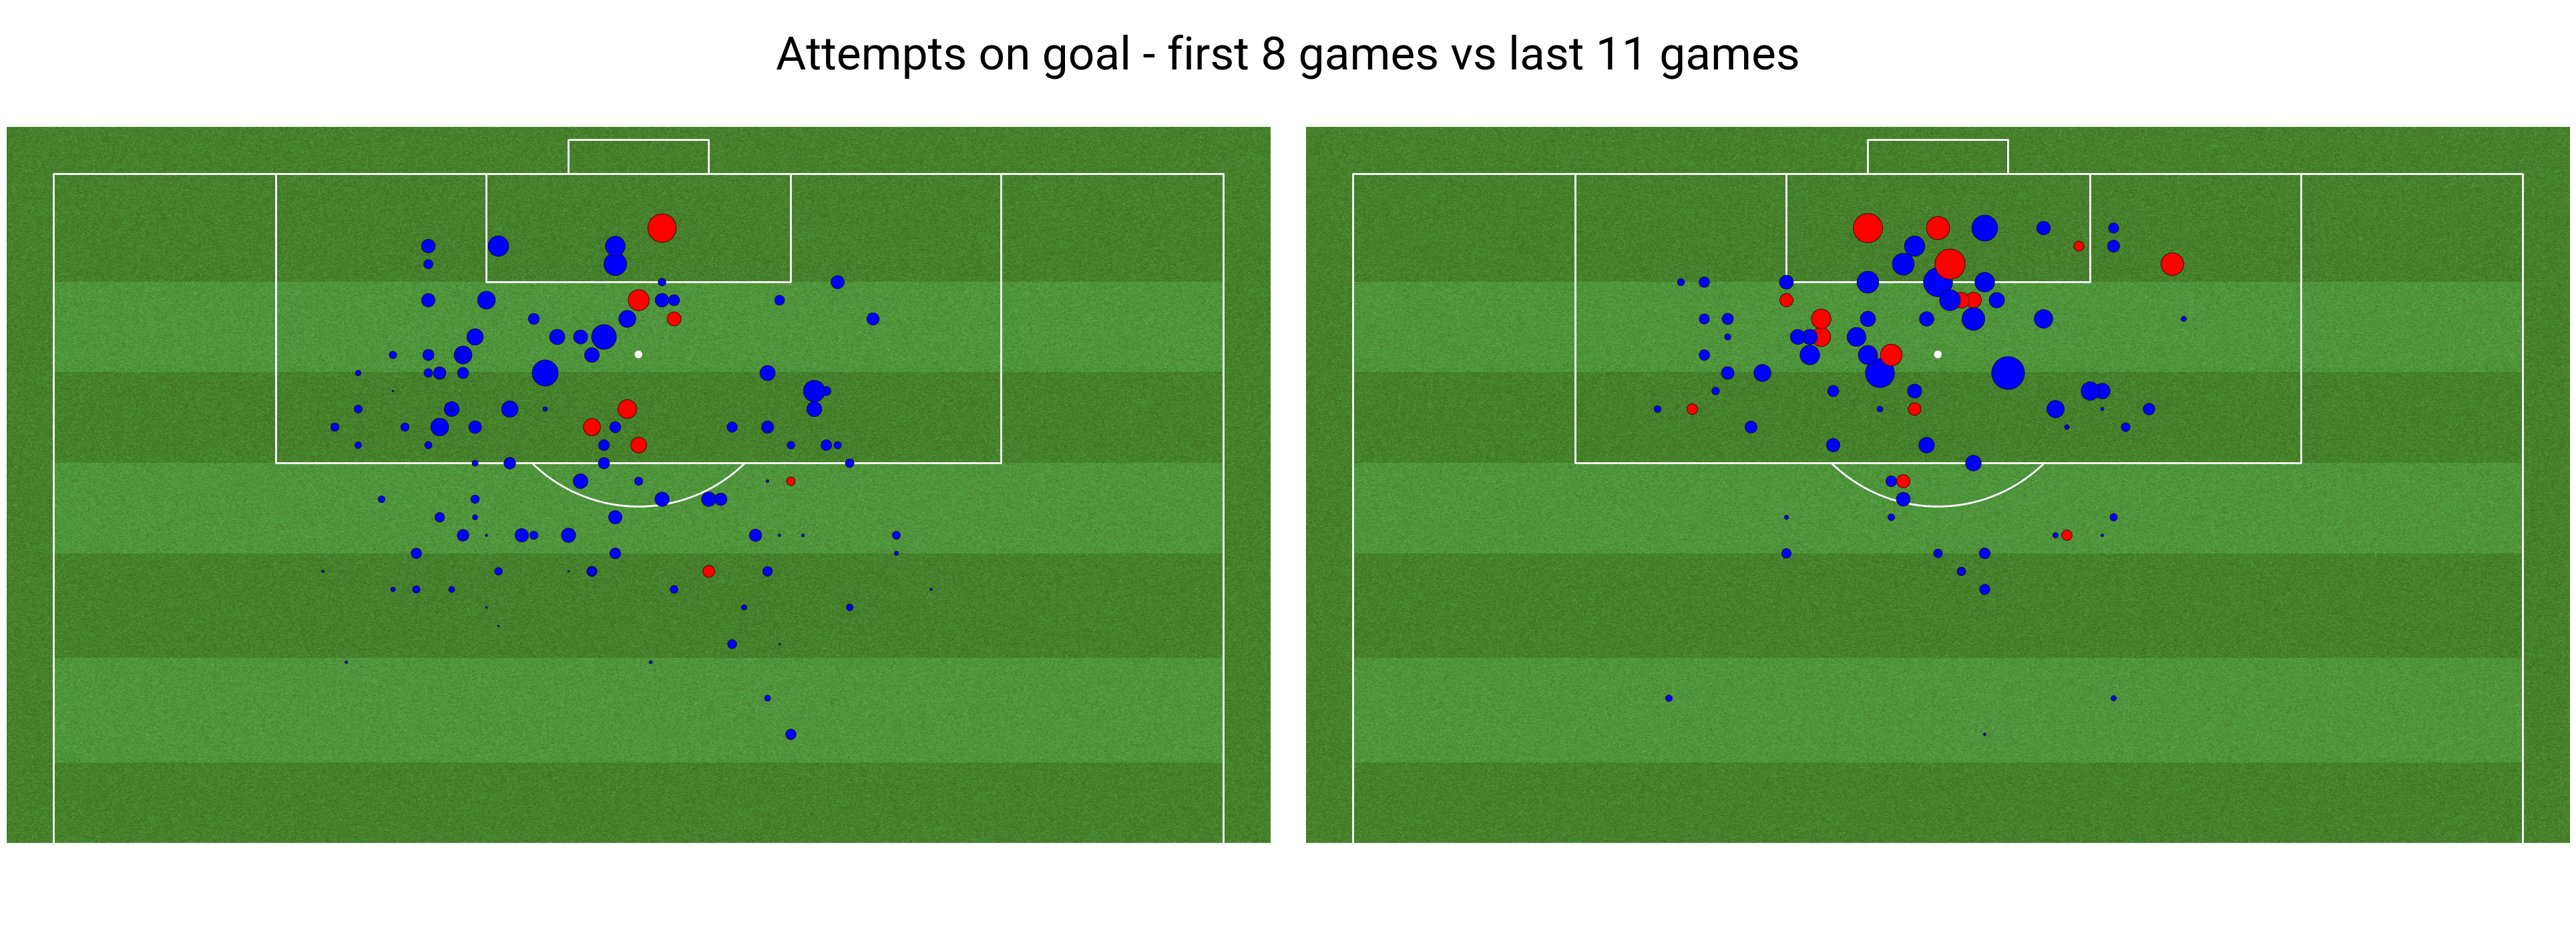

In [13]:
from wyscout.viz.shots import plot_shots_compare

plot_shots_compare(match_events, 11)

In [14]:
from statistics import mean
for i, m in enumerate(match_events[:]):
    shots = [e for e in m["events"] if e["type"]["primary"] in ["shot"]]
    m["total_shots"] = len(shots)
    m["goals"] = len([s for s in shots if s["shot"]["isGoal"] == True ])
    m["average_xg"] = mean([s["shot"]["xg"] for s in shots])
    m["total_xg"] = sum([s["shot"]["xg"] for s in shots])

In [15]:
for m in match_events:
    print(m["label"], m["total_shots"], m["goals"], m["average_xg"], m["total_xg"])

Southend United - Dorking Wanderers, 2-0 8 1 0.16764 1.3411199999999999
Southend United - Notts County, 2-2 8 2 0.095631875 0.765055
Barnet - Southend United, 0-3 12 2 0.15816083333333333 1.8979299999999997
York City - Southend United, 0-2 8 2 0.19381500000000002 1.5505200000000001
Maidstone United - Southend United, 0-3 11 3 0.13686318181818183 1.505495
Southend United - Scunthorpe United, 3-0 13 3 0.14898876923076923 1.936854
Dagenham & Redbridge - Southend United, 1-1 11 1 0.11981636363636364 1.31798
Southend United - Woking, 1-1 10 1 0.08374856 0.8374855999999999
Southend United - Yeovil Town, 1-0 16 1 0.13650575 2.184092
Wealdstone - Southend United, 0-1 14 0 0.1613432142857143 2.2588050000000006
Southend United - Wrexham, 0-0 13 0 0.0691403076923077 0.898824
Chesterfield - Southend United, 3-2 13 2 0.06985930769230769 0.908171
Southend United - Torquay United, 1-2 28 1 0.10129760714285714 2.8363329999999998
Southend United - Maidenhead United, 2-0 16 2 0.092575625 1.48121
Eastlei

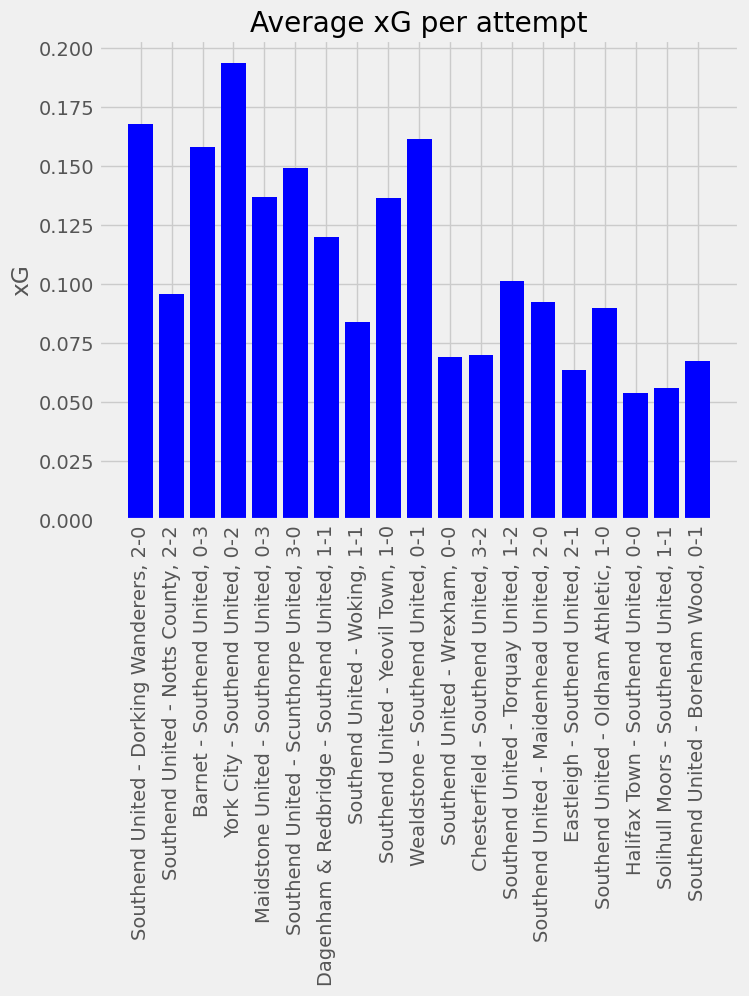

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(
    [m["label"] for m in match_events],
    [m["average_xg"] for m in match_events],
    color=["blue"]
)
plt.xticks(rotation=90)
plt.title("Average xG per attempt")
plt.ylabel("xG")
plt.style.use("fivethirtyeight")
plt.show()